In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm



In [112]:
data = pd.read_csv("../prices.txt", sep="\\s+", header=None, index_col=None)
data.index = list(range(data.shape[0]))
data

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,38.25,69.06,62.08,31.80,63.01,28.30,36.93,43.23,42.31,67.37,...,74.39,41.30,30.05,39.53,76.07,28.62,72.03,24.02,76.03,27.50
1,38.11,69.98,62.39,31.74,62.49,28.23,37.13,42.85,41.85,68.41,...,74.69,41.70,30.18,38.93,75.71,28.47,72.11,24.04,76.05,27.54
2,37.90,69.56,62.82,31.57,62.74,28.60,36.57,42.99,41.48,69.84,...,75.14,41.14,30.09,38.17,75.56,28.48,72.54,23.76,75.66,27.55
3,37.64,69.39,63.26,31.56,61.85,28.67,37.09,43.23,41.24,70.36,...,75.24,41.38,30.08,38.24,75.35,28.59,73.75,23.97,75.71,27.74
4,37.70,69.71,64.04,31.42,62.02,28.42,37.09,42.90,41.40,69.12,...,75.33,41.69,30.34,37.85,75.21,28.55,74.32,24.01,75.77,27.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,33.00,50.72,49.67,34.37,42.13,24.85,17.15,45.52,31.03,51.68,...,77.37,35.49,28.30,27.78,69.38,27.57,67.43,16.06,83.25,27.50
996,32.88,50.78,49.55,34.35,41.60,24.84,16.94,46.13,30.77,53.43,...,77.48,35.85,28.13,28.00,69.31,27.61,67.96,16.10,83.26,27.41
997,32.59,51.01,49.88,33.72,41.58,25.00,16.88,45.61,31.16,52.48,...,77.71,36.26,27.72,27.94,69.20,27.45,66.92,16.22,83.37,27.45
998,32.57,50.73,50.18,34.24,41.52,25.01,16.69,45.75,31.52,52.33,...,77.28,36.39,27.74,27.85,68.93,27.29,66.85,16.00,83.32,27.54


In [113]:
train_df = data.iloc[:500]
test_df = data.iloc[500:]

In [114]:
print(train_df.sum(axis=1).pct_change().std())

0.0016280517159101703


In [115]:
total_returns = train_df.sum(axis=1).pct_change().dropna()
total_returns = total_returns[abs(total_returns) < 0.0005]
total_returns

2     -0.000067
5      0.000230
6     -0.000247
9      0.000377
18    -0.000258
         ...   
471    0.000193
486    0.000439
493    0.000464
497   -0.000289
498   -0.000495
Length: 116, dtype: float64

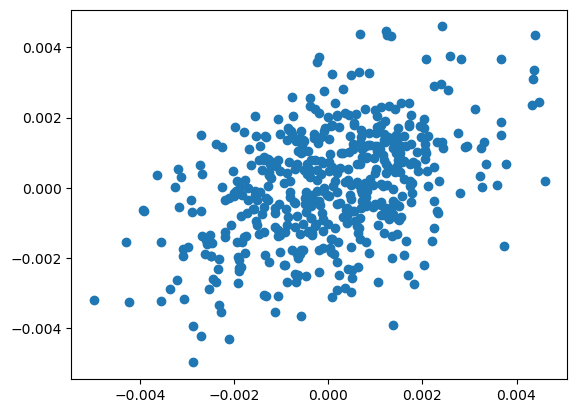

In [116]:
plt.plot(train_df.sum(axis=1).pct_change(), train_df.sum(axis=1).pct_change().shift(1), 'o')

In [117]:
train_df.sum(axis=1).pct_change().dropna().reindex()

1      0.001693
2     -0.000067
3      0.000688
4      0.001735
5      0.000230
         ...   
495    0.001194
496    0.000776
497   -0.000289
498   -0.000495
499    0.001114
Length: 499, dtype: float64

In [118]:
model = ARIMA(train_df.sum(axis=1).pct_change().dropna().to_numpy(), order=(2, 0, 0))
res = model.fit(method_kwargs={'maxiter': 300})
print(res.mle_retvals)
print(list(res.params))
res.summary()

{'fopt': -5.110917633347943, 'gopt': array([ 5.73751970e-03, -9.00639829e-04, -1.17020704e-04,  4.60881001e+00]), 'fcalls': 130, 'warnflag': 0, 'converged': True, 'iterations': 2}
[3.84080926506973e-05, 0.3937045552429772, 0.0940646102742078, 2.12822641677198e-06]


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  499
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2550.348
Date:                Sun, 20 Jul 2025   AIC                          -5092.696
Time:                        00:14:14   BIC                          -5075.845
Sample:                             0   HQIC                         -5086.083
                                - 499                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.841e-05      0.000      0.301      0.763      -0.000       0.000
ar.L1          0.3937      0.043      9.251      0.000       0.310       0.477
ar.L2          0.0941      0.044      2.150      0.032       0.008       0.180
sigma2      2.128e-06    1.4e-07     15.169      0.000    1.85e-06     2.4e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.92   Prob(JB):                         0.77
Heteroskedasticity (H):               1.36   Skew:                             0.04
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [119]:
model = ARIMA(data.iloc[:500].sum(axis=1).pct_change(), order=(2, 0, 0))
res = model.fit()
print(res.params.iloc[1])
res.summary()

0.3937045552429772


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 0)   Log Likelihood                2550.348
Date:                Sun, 20 Jul 2025   AIC                          -5092.696
Time:                        00:14:14   BIC                          -5075.837
Sample:                             0   HQIC                         -5086.081
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.841e-05      0.000      0.301      0.763      -0.000       0.000
ar.L1          0.3937      0.043      9.251      0.000       0.310       0.477
ar.L2          0.0941      0.044      2.150      0.032       0.008       0.180
sigma2      2.128e-06    1.4e-07     15.169      0.000    1.85e-06     2.4e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.92   Prob(JB):                         0.79
Heteroskedasticity (H):               1.36   Skew:                             0.04
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
model = ARIMA(data.iloc[:750].sum(axis=1).pct_change(), order=(2, 0, 0))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  750
Model:                 ARIMA(2, 0, 0)   Log Likelihood                3834.656
Date:                Sun, 20 Jul 2025   AIC                          -7661.312
Time:                        00:14:15   BIC                          -7642.832
Sample:                             0   HQIC                         -7654.191
                                - 750                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.48e-05   9.96e-05      0.149      0.882      -0.000       0.000
ar.L1          0.3795      0.036     10.616      0.000       0.309       0.450
ar.L2          0.0898      0.036      2.486      0.013       0.019       0.161
sigma2      2.092e-06   1.09e-07     19.249      0.000    1.88e-06     2.3e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.93   Prob(JB):                         0.99
Heteroskedasticity (H):               1.18   Skew:                             0.01
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
np.corrcoef(data.sum(axis=1).pct_change().dropna().iloc[1:], data.sum(axis=1).pct_change().dropna().iloc[:-1])[0, 1]

0.41025577262918456

In [122]:
result = {}
good = {}
overall = train_df.sum(axis=1).pct_change().dropna()
end = overall.shape[0]
for i in range(50):
    for j in range(-10, 10, 1):
        if j == 0:
            continue
        if j < 0:
            coeff = np.corrcoef(train_df[i].pct_change().dropna().iloc[:j], overall.iloc[-j:])[0, 1]
        else:
            coeff = np.corrcoef(train_df[i].pct_change().dropna().iloc[j:], overall.iloc[:-j])[0, 1]
        if abs(coeff) > 0.1:
            good[(i, j)] = coeff
        result[(i, j)] = coeff

In [123]:
good

{(0, -5): -0.10091422857734572,
 (5, -3): 0.12827399145425675,
 (5, -2): 0.11993951846681364,
 (5, -1): 0.11377087686337299,
 (7, -9): -0.10277117967400067,
 (7, -2): 0.10544747205656782,
 (7, -1): 0.17112662763514122,
 (8, 3): 0.10081848013063684,
 (9, 4): 0.10072260032115044,
 (12, -5): 0.12508026751005227,
 (12, -1): 0.13422653079747227,
 (13, -1): 0.1282595168688408,
 (13, 1): 0.17695029748013014,
 (16, -3): 0.10517957456567913,
 (16, 2): 0.16426850398801854,
 (16, 9): 0.10140991068736363,
 (17, -9): 0.1091416473814538,
 (17, -4): 0.13190877872327722,
 (17, 1): 0.18801279940340876,
 (17, 3): 0.1570849690257101,
 (18, -1): 0.10441147380570925,
 (19, 1): 0.11773984613135474,
 (20, 1): 0.1496070255973836,
 (21, -1): 0.12061429300707467,
 (21, 1): 0.18706436004617175,
 (21, 3): 0.13150525770163995,
 (22, -10): 0.12830923554224324,
 (22, -2): 0.12557704817273832,
 (22, 2): 0.11969022023570335,
 (23, -2): 0.11240583251605944,
 (23, -1): 0.17120333181508285,
 (23, 1): 0.11557613651887394,

In [124]:
result

{(0, -10): 0.0071784787882245476,
 (0, -9): -0.022952585566898682,
 (0, -8): -0.01842611231901023,
 (0, -7): -0.057952777953528725,
 (0, -6): -0.04877070640534816,
 (0, -5): -0.10091422857734572,
 (0, -4): 0.020793982893885274,
 (0, -3): 0.015066068880035447,
 (0, -2): 0.061124235993177956,
 (0, -1): 0.06205059861007029,
 (0, 1): 0.08122813803527389,
 (0, 2): 0.01807094778133098,
 (0, 3): -0.0676517727790658,
 (0, 4): -0.054779398158589926,
 (0, 5): -0.04634968025791047,
 (0, 6): -0.07387730983256817,
 (0, 7): -0.04019578793716003,
 (0, 8): 0.015108120465742347,
 (0, 9): -0.022842891395007427,
 (1, -10): -0.035497732540669374,
 (1, -9): -0.0031899676234245556,
 (1, -8): 0.005001603840841646,
 (1, -7): -0.01719046789759492,
 (1, -6): -0.008141249735751959,
 (1, -5): -0.09586348829582324,
 (1, -4): -0.005476318565536907,
 (1, -3): -0.022837905858452554,
 (1, -2): -0.021438058525956472,
 (1, -1): 0.031237915068501473,
 (1, 1): 0.0896605529111334,
 (1, 2): 0.09683031194754935,
 (1, 3): 0.0

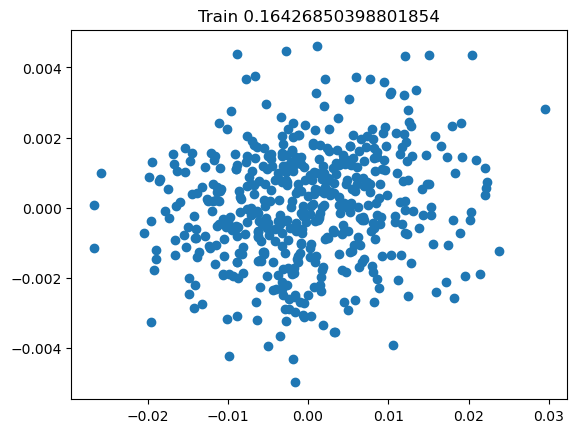

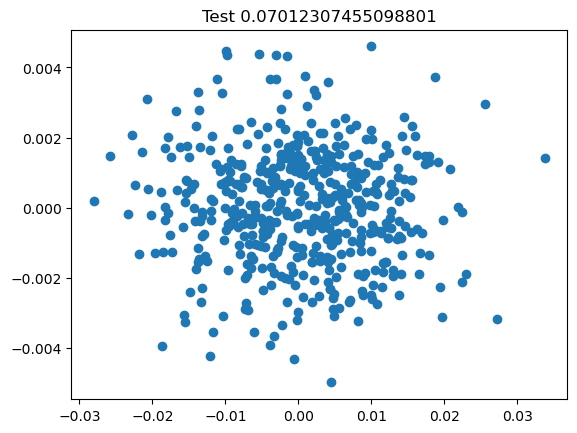

In [125]:
TEST = 16
j = 2

if j < 0:
    coeff = np.corrcoef(train_df[TEST].pct_change().dropna().iloc[:j], train_df.sum(axis=1).pct_change().dropna().iloc[-j:])[0, 1]
else:
    coeff = np.corrcoef(train_df[TEST].pct_change().dropna().iloc[j:], train_df.sum(axis=1).pct_change().dropna().iloc[:-j])[0, 1]

plt.figure()
plt.title(f"Train {coeff}")
plt.plot(train_df[TEST].pct_change(), train_df.sum(axis=1).pct_change().shift(j), 'o')

if j < 0:
    coeff = np.corrcoef(test_df[TEST].pct_change().dropna().iloc[:j], test_df.sum(axis=1).pct_change().dropna().iloc[-j:])[0, 1]
else:
    coeff = np.corrcoef(test_df[TEST].pct_change().dropna().iloc[j:], test_df.sum(axis=1).pct_change().dropna().iloc[:-j])[0, 1]

plt.figure()
plt.title(f"Test {coeff}")
plt.plot(test_df[TEST].pct_change(), train_df.sum(axis=1).pct_change().shift(j), 'o')

In [126]:
y = train_df[0].pct_change().iloc[3:].to_numpy()
X = pd.DataFrame({"-1": train_df.sum(axis=1).pct_change().iloc[1:-2].to_numpy(), "-2": train_df.sum(axis=1).pct_change().iloc[2:-1].to_numpy()})
X = sm.add_constant(X)
print(X)
print(y.shape)
model = sm.OLS(y, X)
model = model.fit()
model.params

     const        -1        -2
0      1.0  0.001693 -0.000067
1      1.0 -0.000067  0.000688
2      1.0  0.000688  0.001735
3      1.0  0.001735  0.000230
4      1.0  0.000230 -0.000247
..     ...       ...       ...
492    1.0  0.000464  0.001909
493    1.0  0.001909  0.001194
494    1.0  0.001194  0.000776
495    1.0  0.000776 -0.000289
496    1.0 -0.000289 -0.000495

[497 rows x 3 columns]
(497,)


const   -0.000207
-1      -0.062688
-2       0.259723
dtype: float64

In [127]:
train_df.sum(axis=1).pct_change().iloc[2:-1]

2     -0.000067
3      0.000688
4      0.001735
5      0.000230
6     -0.000247
         ...   
494    0.001909
495    0.001194
496    0.000776
497   -0.000289
498   -0.000495
Length: 497, dtype: float64